# 쇼핑몰 리뷰 데이터셋
- https://drive.google.com/file/d/1ahcYxV7siixzb0DllPTaZblwCxh0Zuuv/view?usp=sharing

# 주제 분석(Topic Analysis)
- 텍스트 데이터에 대한 비지도 학습
- 텍스트 데이터에서 **주제(토픽)**를 자동으로 추출하거나 분류하는 자연어 처리(NLP)의 한 기술
- 문서, 리뷰, 뉴스 기사 등 다양한 텍스트 데이터가 가지고 있는 숨겨진 구조를 이해하고자 할 때 사용
- 문서의 단어빈도에 영향을 미치는 잠재 변수가 있다고 가정
> 여기서 잠재변수를 주제(topic) 라고 한다.


## 토픽(Topic)
- 텍스트 데이터에서 반복적으로 나타나는 단어 그룹이나 주제를 말함
- 예:
    - 뉴스 기사에서 "경제", "스포츠", "정치" 등이 주요 토픽일 수 있음
    - 고객 리뷰에서 "서비스 품질", "가격", "상품 기능" 등이 주요 토픽일 수 있음

## 토픽 분석 목적
- 텍스트 데이터의 숨겨진 구조 이해
- 대량의 텍스트를 요약
- 유사한 텍스트 간의 군집화
- 정보 검색등의 시스템 개선

## 토픽 분석의 유형
- 비 지도 학습 기반 토픽 모델링
    - 텍스트 데이터에서 토픽을 자동으로 추출
    - LSA, LDA 등의 방식을 사용
- 지도 학습 기반 토픽 모델링
    - 특정 주제 또는 레이블로 미리 정의된 텍스트를 분류
    - 머신러닝, 딥러닝 모델 등을 사용

## 활용 사례
- 문서 요약
    - 대량의 문서를 요약하여 주요 주제를 파악
- 의견 분석
    - 고객 리뷰에서 긍정적/부정적 요소와 관련된 토픽을 추출
- 추천 시스템
    - 문서나 상품을 유사한 토픽 기반으로 추천
- 뉴스 분류 및 클러스터링
    - 유사한 주제를 가진 뉴스를 자동으로 묶거나 분류
- 소셜 미디어 분석
    - 트윗, 댓글, 포럼 데이터에서 특정 주제의 대화를 분석

# LSA(Latent Semantic Analysis)
- 잠재 의미 분석
- 단어 문서 행렬을 행렬분해하는 방법
    - SVD를 기반으로 한 행렬 분해 방법
    - LSA는 문서-단어 행렬에서 숨겨진 의미를 추출하기 위해 SVD를 사용
- 계산이 비교적 단순하고 통계학에서 많이 사용되는 기법
- 문서들이 단어가 아닌 의미상으로 재배치 되는 효과
- 동음이의어, 오탈자 등이 어느정도 처리가 되는 효과
- 문서에 존재하는 noise가 줄어 전처리 되는 효과


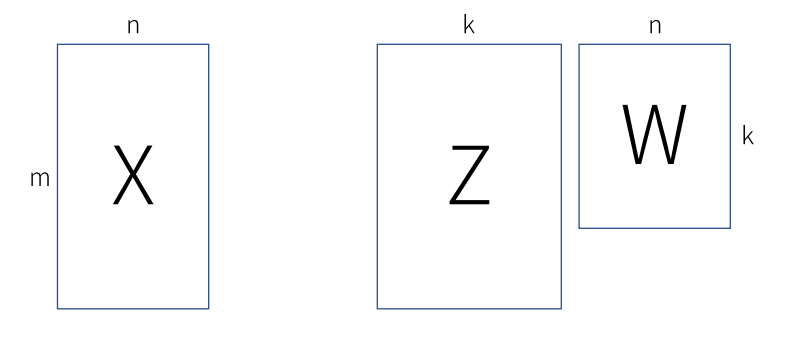

## Truncated SVD 활용한 주제 분석
1. 텍스트 데이터를 벡터화하여 문서-단어 행렬 생성
2. SVD 적용하여 행렬 분해
- $U$: 문서와 토픽 간의 관계를 나타내는 행렬 ($m \times k$)
- $Σ$: 토픽의 중요도를 나타내는 대각 행렬 ($k \times k$)
- $V^T$: 토픽과 단어 간의 관계를 나타내는 행렬 ($k \times n$)

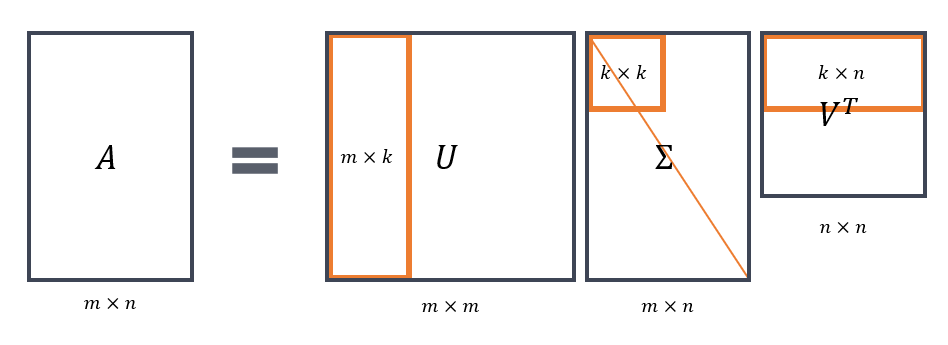

In [8]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

DATA_PATH = "../data/"
SEED = 42

In [9]:
df = pd.read_csv(f"{DATA_PATH}clothing_reviews.csv")
df

,날짜,리뷰
0,2021-03-25,S인데도 굉장히 박시하네요 사진상으론 약간 빛 바랜 검정으로 나왓는데 빛때메 그렇고...
1,2021-01-19,팔길이가 조금 긴 것 같은데 신경 쓰일 정돈 아니고 딱 오버핏이에요 기모도 따뜻해요...
2,2022-11-21,핏은 오버핏이고 자수가 귀여워요\n근데 한번 세탁+건**지 하고 입었는데 먼지 장난...
3,2022-11-11,키 168에 55반 / m사이즈 박시하게 입기에 좋아요\n기모도 따뜻하고 모자도 커...
4,2021-12-22,사이즈는 완전 오버핏이지만 예뻐요\n근데 새옷인데도 검은옷에 겉에 흰 먼지가 많이 ...
...,...,...
4937,2022-08-29,귀여워용 어깨넓어서 그런지입으면 끈모양 이상해 보여서 모델핏은 안나오긴한데 어차피 ...
4938,2022-03-05,"보기에 좀 짧고, 줄길이가 짧울줄 알았는데 괜찮네요!!\n크롭 좋아하는 사람들은 좋..."
4939,2022-01-05,일반 크롭나시 재질에 배송 평범합니다 한 3일 걸린거 같아요 근데 너무 헐렁하고 쫀...
4940,2022-06-20,재질이너무부드러워서 일단만족. 길이는 키 체형에 따라 차이잇을꺼같은데 일단 저한테는...


In [10]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [11]:
kiwi.tokenize(df["리뷰"][0])

[Token(form='S', tag='SL', start=0, len=1),
 Token(form='이', tag='VCP', start=1, len=1),
 Token(form='ᆫ데', tag='EC', start=1, len=2),
 Token(form='도', tag='JX', start=3, len=1),
 Token(form='굉장히', tag='MAG', start=5, len=3),
 Token(form='박', tag='NNP', start=9, len=1),
 Token(form='시', tag='NNG', start=10, len=1),
 Token(form='하', tag='XSA', start=11, len=1),
 Token(form='네요', tag='EF', start=12, len=2),
 Token(form='사진', tag='NNG', start=15, len=2),
 Token(form='상', tag='XSN', start=17, len=1),
 Token(form='으로', tag='JKB', start=18, len=2),
 Token(form='ᆫ', tag='JX', start=19, len=1),
 Token(form='약간', tag='MAG', start=21, len=2),
 Token(form='빛', tag='NNG', start=24, len=1),
 Token(form='바래', tag='VV', start=26, len=2),
 Token(form='ᆫ', tag='ETM', start=27, len=1),
 Token(form='검정', tag='NNG', start=29, len=2),
 Token(form='으로', tag='JKB', start=31, len=2),
 Token(form='나오', tag='VV', start=34, len=2),
 Token(form='엇', tag='EP', start=35, len=1),
 Token(form='는데', tag='EC', start=36,

- NNG(일반 명사), VV(동사), VA(형용사), SL(알파벳)

In [12]:
result = kiwi.tokenize(df["리뷰"])
token_list = []

for tokens in tqdm(result):
    tokens = [t.form for t in tokens if t.tag in ["NNG", "VV", "VA", "SL"]]
    token_list.append(tokens)

0it [00:00, ?it/s]

In [13]:
min(len(token) for token in token_list)

2

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features=1000)
x_arr = vec.fit_transform([" ".join(token) for token in token_list]).A
x_arr.shape

(4942, 1000)

## SVD 적용

In [15]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, random_state=SEED)
u_arr = svd.fit_transform(x_arr)
u_arr.shape

(4942, 20)

## U 행렬

In [16]:
u_arr # 행: 샘플, 열: 주제

array([[ 0.53461531, -0.09051531, -0.38640315, ...,  0.06256717,
         0.40879423, -0.14851619],
       [ 0.58061975, -0.15043304, -0.11470448, ..., -0.12813762,
         0.38186392,  0.04810439],
       [ 0.13734309, -0.00639351, -0.02540889, ..., -0.11036345,
        -0.09977601, -0.33534438],
       ...,
       [ 0.84566844, -0.27639632, -0.11334893, ..., -0.33860383,
         0.43167149,  0.61915159],
       [ 0.79198947, -0.25062681, -0.21093584, ...,  0.46581019,
        -0.01990401,  0.06311191],
       [ 1.26410891, -0.7135997 ,  0.57395538, ...,  0.03146534,
        -0.3116915 , -0.04965665]])

In [17]:
u_arr.shape

(4942, 20)

## 특이값 벡터

In [18]:
svd.singular_values_ # 주제 중요도

array([66.18565081, 42.31416453, 36.76715372, 34.68119624, 33.6617773 ,
       32.95697599, 31.31195617, 30.90508704, 29.70148306, 28.63424847,
       28.2061432 , 27.81326065, 26.63584854, 25.96460416, 25.83023608,
       25.24347016, 24.56293822, 24.47966759, 23.49340182, 22.79758453])

In [19]:
svd.singular_values_.shape

(20,)

## Vt 행렬

In [20]:
svd.components_ # 행: 주제, 열: 단어

array([[ 6.55694698e-03,  7.94576519e-04,  8.81055061e-04, ...,
         4.87316344e-02,  1.67878301e-03,  1.19252718e-02],
       [-7.83877176e-04, -1.11642801e-03,  9.16270354e-04, ...,
        -2.61641752e-02,  5.23869307e-04,  3.00580006e-03],
       [-4.33567294e-03,  1.09475930e-03, -1.10664918e-04, ...,
        -2.65726413e-02, -2.39672012e-03,  2.29218405e-03],
       ...,
       [-6.75753210e-03,  2.65322427e-03,  1.97207994e-03, ...,
         7.93921816e-02, -8.30355025e-04, -1.39156062e-05],
       [-3.27687158e-03,  2.10722593e-03, -6.71929030e-04, ...,
         2.22446132e-01, -6.33226335e-04,  6.86461254e-03],
       [-1.02105997e-03, -8.81055364e-04,  1.02762165e-04, ...,
        -1.51359489e-01,  4.14610686e-03,  5.43734915e-03]])

In [21]:
svd.components_.shape

(20, 1000)

- Vt 행렬의 단어 번호에 대응되는 실제 단어 정보

In [22]:
vec.get_feature_names_out().shape

(1000,)

## K 값(토픽 수) 선택

### 엘보우 방법
- 특이값의 크기를 시각화해서 K 값을 선택하는 방법
- 특이값이 급격히 갑소하다가 완만해지는 지점의 K 값 선택

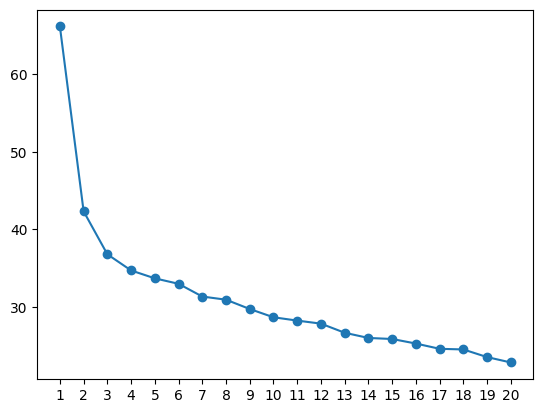

In [23]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,21), svd.singular_values_, marker="o")
plt.xticks(np.arange(1, 21))
plt.show()

## 주제 응집도(Topic coherence)
- 주제를 구성하는 단어들이 서로 연관된 정도
- 0 ~ 1 사이의 값을 가지고, 1에 가까울수록 응집력이 높음

## Gensim 라이브러리
- 파이썬 기반의 자연어 처리 라이브러리
- 토픽 모델링, 워드 임베딩 등 다양한 기능 지원
```bash
pip install gensim
```

## CoherenceModel 클래스
- 토픽의 응집력을 평가하는 클래스
- model: 학습된 토픽 모델 객체 전달
    - topics 파라미터에 인수 전달 시 생략 가능
- topics: 각 토픽에서 추출된 토큰화된 데이터
- texts: 전체 문서의 토큰화된 데이터
- dictionary: gensim의 딕셔너리 객체 전달

In [24]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [25]:
def coherence_score(token_list, svd, words):
    tmp = np.argsort(svd.components_, axis=1)[:, ::-1] # 기본값 오름차순 / 내림차순으로 변경
    topics = []

    for arr in tmp[:, :10]:
        topics.append([words[i] for i in arr])

    dic = Dictionary(token_list)
    cos = CoherenceModel(topics=topics, texts=token_list, dictionary=dic)

    return cos.get_coherence()

In [26]:
words = vec.get_feature_names_out()
coherence_score(token_list, svd, words)

0.3932611160951808

In [27]:
scores = []

for k in tqdm(range(2, 21)):
    svd = TruncatedSVD(n_components=k, random_state=SEED)
    svd.fit(x_arr)
    score = coherence_score(token_list, svd, words)
    scores.append(score)

  0%|          | 0/19 [00:00<?, ?it/s]

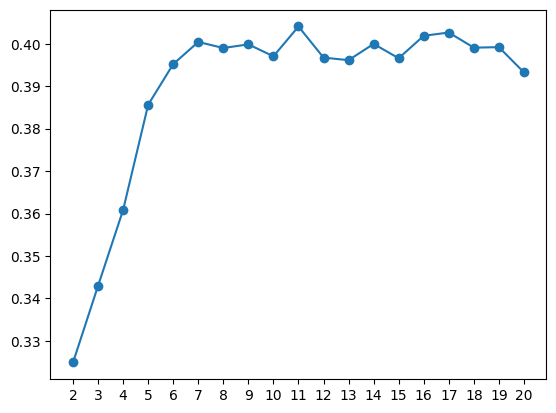

In [28]:
plt.plot(np.arange(2, 21), scores, marker="o")
plt.xticks(np.arange(2, 21))
plt.show()

In [29]:
svd = TruncatedSVD(n_components=8, random_state=SEED)
u_arr = svd.fit_transform(x_arr)
u_arr.shape

(4942, 8)

In [30]:
idx_arr = np.argsort(svd.components_)[:, ::-1] # 열방향 오름차순 -> 내림차순
idx_arr

array([[615, 465, 385, ..., 347, 301, 279],
       [615, 462, 185, ...,  77, 688, 465],
       [465,  77, 615, ...,  84, 385, 688],
       ...,
       [163, 734, 688, ..., 396,  77, 385],
       [734, 385, 426, ..., 361, 396, 163],
       [ 84, 385, 465, ..., 688, 734,  77]], dtype=int64)

In [31]:
words.shape

(1000,)

In [32]:
lst = []

for arr in idx_arr:
    lst.append([words[i] for i in arr])

In [33]:
pd.DataFrame(lst)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,예쁘,생각,보이,느낌,재질,부분,이쁘,괜찮,구매,정도,...,마무리,조음,감촉,적당,크롭기,전용,퀄이,박스,면도,막히
1,예쁘,색감,단추,디테일,구김,청바지,소라,오버핏,언니,생기,...,길이,구매,퀄리티,사이즈,정도,느낌,가격,괜찮,이쁘,생각
2,생각,괜찮,예쁘,후기,이너,놀라,파이,애매,비치,두께,...,만족,사이즈,사진,부분,셔츠,색상,느낌,구매,보이,이쁘
3,이쁘,생각,보이,예쁘,색감,라인,팔뚝,디자인,허리,어깨,...,만족,색상,정도,셔츠,사이즈,괜찮,가격,느낌,구매,재질
4,느낌,보이,부분,가슴,어깨,사진,팔뚝,비치,허리,속옷,...,빠르,셔츠,괜찮,예쁘,정도,가격,색상,배송,이쁘,구매
5,느낌,재질,이쁘,생각,셔츠,색감,예쁘,여름,화면,구김,...,어깨,구매,퀄리티,가슴,가격,배송,정도,부분,괜찮,보이
6,재질,보이,비치,셔츠,생각,속옷,어깨,이너,파이,여리여리,...,마감,괜찮,퀄리티,소재,길이,정도,색상,배송,부분,느낌
7,구매,보이,생각,색상,셔츠,느낌,블랙,여름,어깨,화이트,...,예쁘,마감,퀄리티,정도,부분,배송,가격,이쁘,재질,괜찮


# LDA(Latent Dirichlet Allocation)
- 잠재 디리클레 할당
- 각 문서에 어떤 주제들이 얼마만큼의 확률로 존재하는지에 대한 확률 모델
- 문서에 잠재된 주제를 추출하여 주제 확률 분포로 나타냄
- 각 문서는 여러 주제의 혼합 분포로 되어 있다고 가정
- 우리가 관찰하는 단어는 주제에서 추출된다고 가정

## LDA의 수행 과정
- 깁스 샘플링(Gibbs Sampling) 기법을 사용

1. LDA는 토픽의 개수 k를 입력받는다.
    -  k개의 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정
2. LDA는 모든 문서의 모든 단어에 대해서 k개의 토픽 중 하나의 토픽에 랜덤하게 할당한다.
    - 이 작업이 끝나면 각 문서는 토픽 분포를 가지며, 토픽은 단어 분포를 가진 상태
3. 모든 문서의 모든 단어에 대해서 k개의 토픽중 하나에 재할당
    - 문서 내의 하나의 단어를 토픽에 재할당 하기 위해 문서내의 토픽 분포와 각 토픽의 단어 분포를 계산
    - 나머지 단어들은 정답인 토픽에 할당되었다고 가정
    - 계산한 분포를 기반으로 각 토픽에 할당될 확률을 계산한 후 가장 높은 확률의 토픽에 재할당
    - 모든 문서의 모든 단어에 대해서 반복
    